#Синий

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/zalig/cu-datasets/main/advertisment.csv')
df

,BirthdayYear,Age,Gender,ClientSince,A,B,Purchased
0,2003,21,Male,2023,NaN,NaN,NaN
1,2001,23,Female,2024,NaN,NaN,NaN
2,2002,22,Male,2024,NaN,NaN,NaN
3,2004,20,Male,2023,NaN,1.0,1.0
4,2003,21,Female,2024,NaN,NaN,NaN
...,...,...,...,...,...,...,...
19995,2001,23,Male,2024,NaN,NaN,NaN
19996,2001,23,Male,2024,NaN,NaN,NaN
19997,1998,26,Male,2024,NaN,NaN,NaN
19998,2003,21,Male,2023,NaN,NaN,NaN


In [114]:
#кол-во А
a_cnt = df['A'].agg('count')
print(a_cnt)

300


In [115]:
#кол-во B
b_cnt = df['B'].agg('count')
print(b_cnt)

500


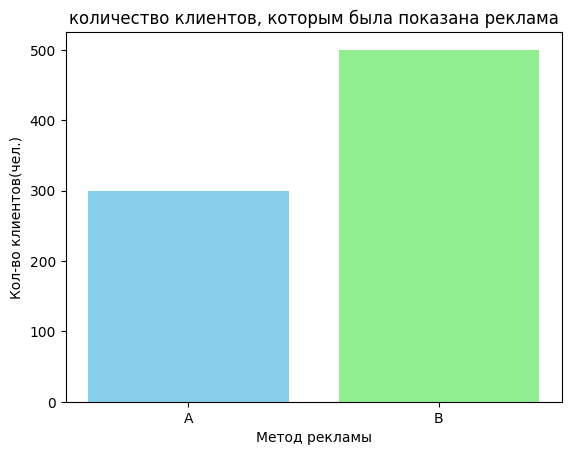

In [116]:
# plt.bar(x = ['A', 'B'] )
plt.bar(x=['A', 'B'], height=[a_cnt, b_cnt], color = ['skyblue', 'lightgreen'])

#называяем оси и график
plt.xlabel("Метод рекламы")
plt.ylabel("Кол-во клиентов(чел.)")
plt.title("количество клиентов, которым была показана реклама")

plt.savefig('кол-во клиентов принявших участие в рекламных компаниях.png')


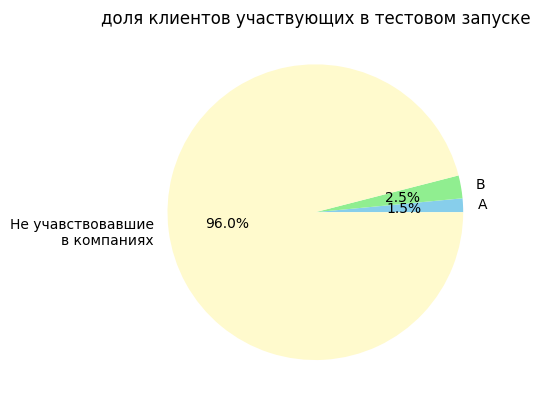

In [117]:
all_cnt = df['Gender'].agg('count')
else_cnt = all_cnt - a_cnt - b_cnt

plt.pie([a_cnt, b_cnt, else_cnt], colors = ['skyblue', 'lightgreen','lemonchiffon'], autopct='%1.1f%%', labels = ['A', 'B','''Не учавствовавшие
в компаниях'''])

plt.title('''доля клиентов участвующих в тестовом запуске''', ha='center', va='top') #loc = 'upper_left')

plt.savefig('отношение клиентов участвующих в тестовом запуске кампаний к остальным.png')


In [118]:
# group_ = df.groupby('Purchased')
# grouped = grouped.agg({'A': 'count', 'B': 'count'})
df[(df['A']==1) & (df['B']==1)].agg('size')

,0
BirthdayYear,0
Age,0
Gender,0
ClientSince,0
A,0
B,0
Purchased,0


Кампании A и В не пересекаются

In [119]:
a_cnt_purch = df[(df['A']==1) & (df['Purchased']==1)].agg('count')['Purchased']
b_cnt_purch = df[(df['B']==1) & (df['Purchased']==1)].agg('count')['Purchased']
all_cnt_purch = df['Purchased'].agg('count')
else_cnt_purch = all_cnt_purch - a_cnt_purch - b_cnt_purch

print('A: ', a_cnt_purch, '   B: ', b_cnt_purch, '   All:', all_cnt_purch, '   else: ', else_cnt_purch)

A:  33    B:  66    All: 1327    else:  1228


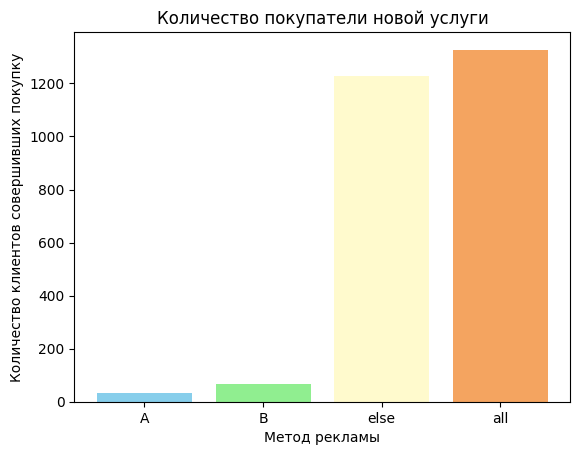

In [120]:
plt.bar(x=['A', 'B', 'else', 'all'], height=[a_cnt_purch, b_cnt_purch, all_cnt_purch - a_cnt_purch - b_cnt_purch, all_cnt_purch],
        color = ['skyblue', 'lightgreen', 'lemonchiffon', 'sandybrown'])

#называяем оси и график
plt.title("Количество покупатели новой услуги")
plt.xlabel("Метод рекламы")
plt.ylabel("Количество клиентов совершивших покупку")

plt.savefig('кол-во Покупателей новой услуги.png')

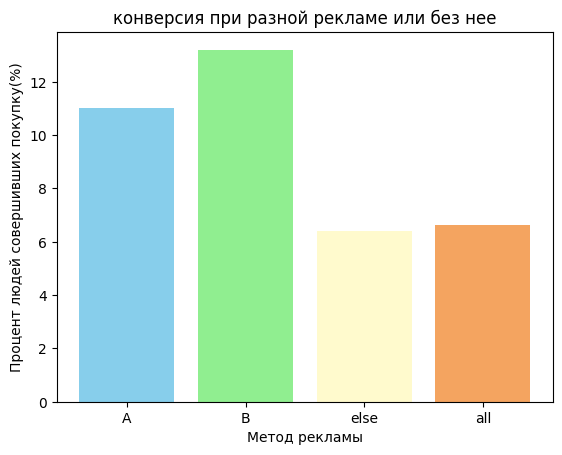

In [121]:
a_convers = (a_cnt_purch / a_cnt) * 100
b_convers = (b_cnt_purch / b_cnt) * 100

else_convers = ((all_cnt_purch - a_cnt_purch - b_cnt_purch) / (all_cnt - a_cnt - b_cnt)) * 100
all_convers = ((all_cnt_purch / all_cnt)) * 100
plt.bar(x=['A', 'B', 'else', 'all'], height=[a_convers, b_convers, else_convers, all_convers], color = ['skyblue', 'lightgreen', 'lemonchiffon', 'sandybrown'])

#называяем оси и график
plt.title("конверсия при разной рекламе или без нее")
plt.xlabel("Метод рекламы")
plt.ylabel("Процент людей совершивших покупку(%)")

plt.savefig('конверсия при разной рекламе или без нее.png')



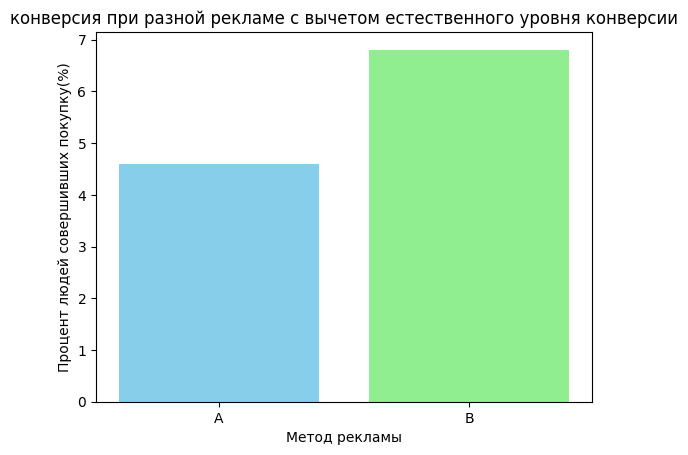

In [122]:
plt.bar(x=['A', 'B'], height=[a_convers - else_convers, b_convers - else_convers], color = ['skyblue', 'lightgreen'])

plt.title("конверсия при разной рекламе с вычетом естественного уровня конверсии")
plt.xlabel("Метод рекламы")
plt.ylabel("Процент людей совершивших покупку(%)")

plt.savefig('конверсия при разной рекламе с вычетом естественного уровня конверсии.png')


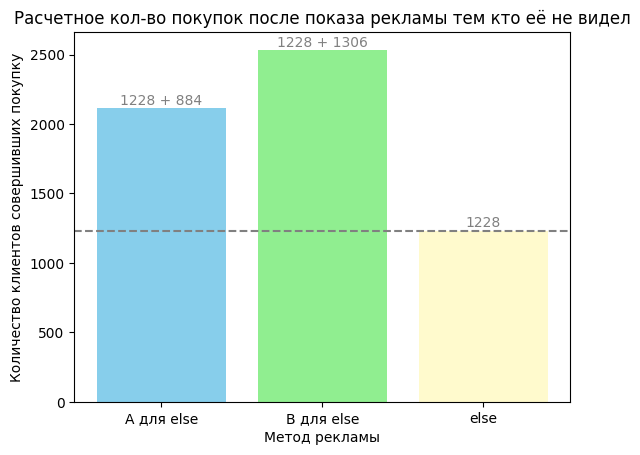

In [123]:

plt.bar(x=['A для else', 'B для else', 'else'], height=[ (else_cnt *  a_convers/100), (else_cnt *  b_convers/100), else_cnt_purch],
        color = ['skyblue', 'lightgreen', 'lemonchiffon', 'sandybrown'])

#называяем оси и график
plt.title("Расчетное кол-во покупок после показа рекламы тем кто её не видел")
plt.xlabel("Метод рекламы")
plt.ylabel("Количество клиентов совершивших покупку")

#наносим линию
plt.axhline(y = else_cnt_purch, linestyle='--', color='gray')
plt.text(x=2 , y=else_cnt_purch , s=f'''{else_cnt_purch}
         ''', ha='center', va='center', color='gray')

plt.text(x=0 , y=(else_cnt *  a_convers/100) , s=f'''{else_cnt_purch} + {int(else_cnt *  a_convers/100) - else_cnt_purch}
         ''', ha='center', va='center', color='gray')

plt.text(x=1 , y=(else_cnt *  b_convers/100) - 10 , s=f'''{else_cnt_purch} + {int(else_cnt *  b_convers/100) - else_cnt_purch}
         ''', ha='center', va='center', color='gray')


plt.savefig('Расчетное кол-во покупок после показа рекламы тем кто её не видел.png')

#Красный уровень

In [124]:
def en(s):
  s_splited = s.split('/n')
  res = '''
'''.join(s_splited)
  return res

# print(en('A для else/nProfit'))

def sp(x, repeat):
  x = str(x)
  for k in range(1, repeat+1):
    x = x[:-3 *(k)  - (k-1)] + ' ' + x[-3 *(k) - (k-1):]
  return x
print(sp(12152132000,3))

12 152 132 000


Text(1, 1306.4, '1306\n         ')

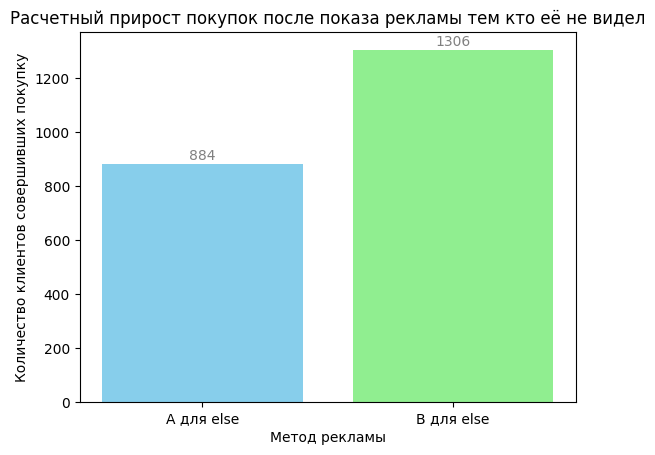

In [125]:
# СКОЛЬКО !ДОПОЛНИТЕЛЬНЫХ! ПОКУПОК В КАТЕГОРИИ
a_purch_for_else = (else_cnt *  a_convers/100) - else_cnt_purch
b_purch_for_else = (else_cnt *  b_convers/100)- else_cnt_purch
plt.bar(x=['A для else', 'B для else',], height=[ a_purch_for_else,b_purch_for_else],
        color = ['skyblue', 'lightgreen']) #, 'lemonchiffon', 'sandybrown'])

#называяем оси и график
plt.title("Расчетный прирост покупок после показа рекламы тем кто её не видел")
plt.xlabel("Метод рекламы")
plt.ylabel("Количество клиентов совершивших покупку")

plt.text(x=0 , y= a_purch_for_else , s=f'''{int(a_purch_for_else)}
         ''', ha='center', va='center', color='gray')

plt.text(x=1 , y= b_purch_for_else , s=f'''{int(b_purch_for_else)}
         ''', ha='center', va='center', color='gray')


300 500 19200 884.0 1306.4 1536000


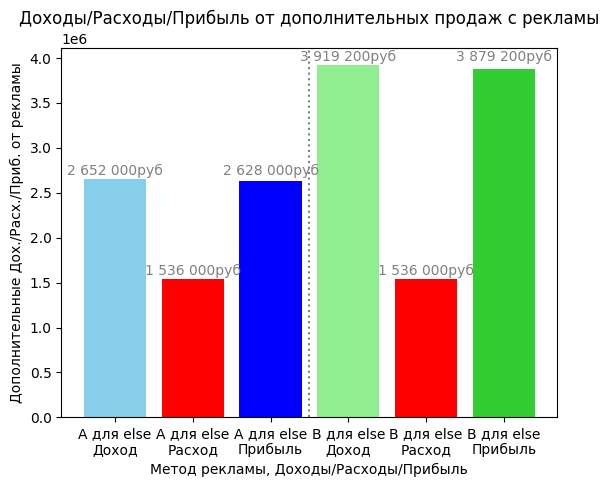

In [126]:


plt.bar(x=[en('A для else/nДоход'), en('A для else/nРасход'), en('A для else/nПрибыль'),   en('B для else/nДоход'), en('B для else/nРасход'), en('В для else/nПрибыль') ],
        height=[ a_purch_for_else * 3_000, else_cnt * 80, (a_purch_for_else * 3_000 - a_cnt * 80)  ,b_purch_for_else * 3_000, else_cnt * 80, (b_purch_for_else * 3_000 - b_cnt * 80)],
        color = ['skyblue', 'r', 'b', 'lightgreen', 'r', 'limegreen']) #, 'lemonchiffon', 'sandybrown'])

# plt.yscale('log')
#называяем оси и график
plt.title("Доходы/Расходы/Прибыль от дополнительных продаж с рекламы")
plt.xlabel("Метод рекламы, Доходы/Расходы/Прибыль")
plt.ylabel("Дополнительные Дох./Расх./Приб. от рекламы")

#  A
plt.text(x=0 , y= a_purch_for_else * 3_000 , s=f'''{sp(int(a_purch_for_else * 3_000),2)}руб
         ''', ha='center', va='center', color='gray')

plt.text(x=1 , y= else_cnt * 80 , s=f'''{sp(int(else_cnt * 80),2)}руб
         ''', ha='center', va='center', color='gray')

plt.text(x=2 , y= a_purch_for_else * 3_000 , s=f'''{sp(int(a_purch_for_else * 3_000) - int(a_cnt * 80),2)}руб
         ''', ha='center', va='center', color='gray')

# B
plt.text(x=3 , y= b_purch_for_else * 3_000 , s=f'''{sp(int(b_purch_for_else * 3_000),2)}руб
         ''', ha='center', va='center', color='gray')

plt.text(x=4 , y= else_cnt * 80 , s=f'''{sp(int(else_cnt * 80),2)}руб
         ''', ha='center', va='center', color='gray')

plt.text(x=5 , y= b_purch_for_else * 3_000 , s=f'''{sp(int(b_purch_for_else * 3_000)  - int(b_cnt * 80),2)}руб
         ''', ha='center', va='center', color='gray')

# наносим линию между А и В
plt.axvline(x = 2.5, linestyle = ':', color = 'gray')

print(a_cnt, b_cnt, else_cnt, a_purch_for_else, b_purch_for_else, else_cnt * 80)

In [127]:
df

,BirthdayYear,Age,Gender,ClientSince,A,B,Purchased
0,2003,21,Male,2023,NaN,NaN,NaN
1,2001,23,Female,2024,NaN,NaN,NaN
2,2002,22,Male,2024,NaN,NaN,NaN
3,2004,20,Male,2023,NaN,1.0,1.0
4,2003,21,Female,2024,NaN,NaN,NaN
...,...,...,...,...,...,...,...
19995,2001,23,Male,2024,NaN,NaN,NaN
19996,2001,23,Male,2024,NaN,NaN,NaN
19997,1998,26,Male,2024,NaN,NaN,NaN
19998,2003,21,Male,2023,NaN,NaN,NaN


In [128]:
pivot_Gender_A = df.pivot_table(index = 'Gender', columns ='A', aggfunc = 'count')['Age']
pivot_Gender_A

A,1.0
Gender,
Female,140
Male,160


In [129]:
pivot_Gender_B = df.pivot_table(index = 'Gender', columns ='B', aggfunc = 'count')['Age']
pivot_Gender_B

B,1.0
Gender,
Female,239
Male,261


In [130]:
# import numpy as np

pivot_Gender_all = df.pivot_table(index = 'Gender', aggfunc = 'count')
# pivot_Gender_all = pivot_Gender_all['Age':'B']# + pivot_Gender_all['A'] + pivot_Gender_all['B']
pivot_Gender_all = pivot_Gender_all.T.head(3).T
pivot_Gender_all


,A,Age,B
Gender,,,
Female,140,9879,239
Male,160,10121,261


In [131]:
gruped = pivot_Gender_all.groupby(['A',	'Age'])
gruped = gruped.agg({'A': 'sum'})
gruped

,,A
A,Age,
140,9879,140
160,10121,160


In [132]:
# a_Fem_cnt = df[]

# plt.bar(x=['A Female', 'A Male', ],
        # height=[],
        # color = ['lightgreen', 'r', 'limegreen', 'skyblue', 'r','b']) #, 'lemonchiffon', 'sandybrown'])

##Клиенты по полу среди всех, контрольной группы, А и В


In [133]:
df

,BirthdayYear,Age,Gender,ClientSince,A,B,Purchased
0,2003,21,Male,2023,NaN,NaN,NaN
1,2001,23,Female,2024,NaN,NaN,NaN
2,2002,22,Male,2024,NaN,NaN,NaN
3,2004,20,Male,2023,NaN,1.0,1.0
4,2003,21,Female,2024,NaN,NaN,NaN
...,...,...,...,...,...,...,...
19995,2001,23,Male,2024,NaN,NaN,NaN
19996,2001,23,Male,2024,NaN,NaN,NaN
19997,1998,26,Male,2024,NaN,NaN,NaN
19998,2003,21,Male,2023,NaN,NaN,NaN


цвета  ['lightgreen','skyblue', 'lemonchiffon', 'sandybrown'];

для пола ['deepskyblue', 'hotpink']

,count
Gender,
Male,10121
Female,9879


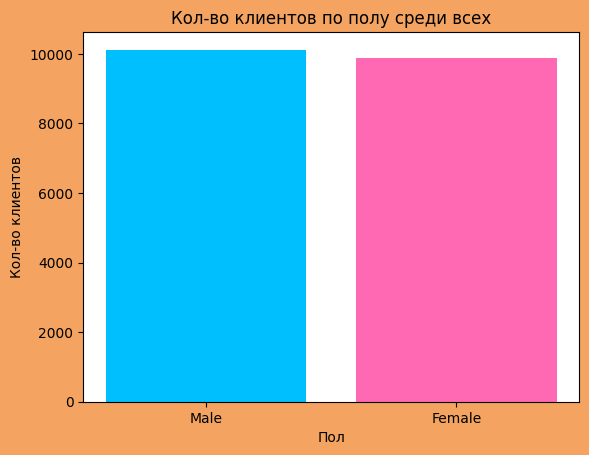

In [134]:
all_F_M =  df['Gender'].value_counts()

plt.figure(facecolor='sandybrown')
plt.bar(['Male', 'Female'], all_F_M, color = ['deepskyblue', 'hotpink'])
plt.title('Кол-во клиентов по полу среди всех')
plt.xlabel('Пол')
plt.ylabel('Кол-во клиентов')

all_F_M


,count
Gender,
Male,617
Female,611


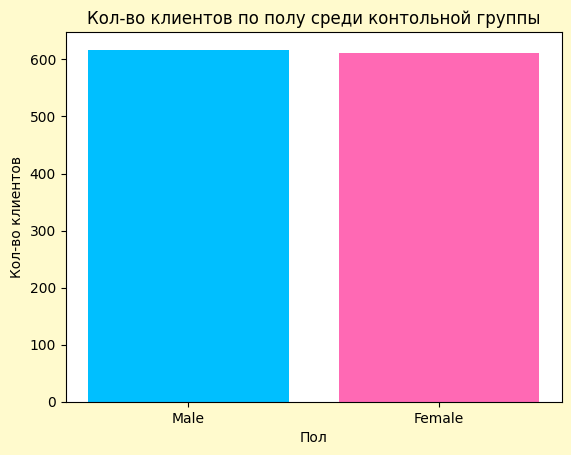

In [135]:
control_F_M =  df[(df['A'] != 1) & (df['B'] != 1) & (df['Purchased'] == 1)]['Gender'].value_counts()

plt.figure(facecolor='lemonchiffon')
plt.bar(['Male', 'Female'], control_F_M, color = ['deepskyblue', 'hotpink'])
plt.title('Кол-во клиентов по полу среди контольной группы')
plt.xlabel('Пол')
plt.ylabel('Кол-во клиентов')


control_F_M

,count
Gender,
Male,160
Female,140


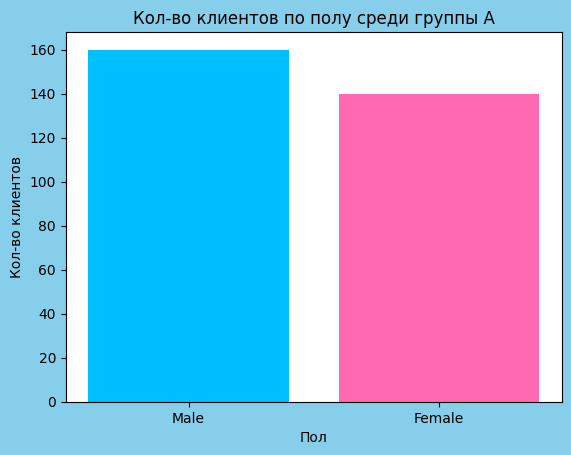

In [136]:
a_F_M =  df[df['A'] == 1]['Gender'].value_counts()

plt.figure(facecolor='skyblue')
plt.bar(['Male', 'Female'], a_F_M, color = ['deepskyblue', 'hotpink'])
plt.title('Кол-во клиентов по полу среди группы A')
plt.xlabel('Пол')
plt.ylabel('Кол-во клиентов')


a_F_M

,count
Gender,
Male,261
Female,239


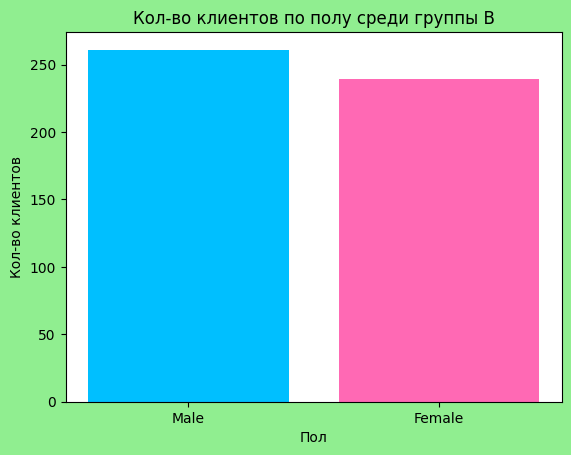

In [137]:
b_F_M =  df[df['B'] == 1]['Gender'].value_counts()

plt.figure(facecolor='lightgreen')
plt.bar(['Male', 'Female'], b_F_M, color = ['deepskyblue', 'hotpink'])
plt.title('Кол-во клиентов по полу среди группы B')
plt.xlabel('Пол')
plt.ylabel('Кол-во клиентов')


b_F_M

##Клиенты по возрасту до 23/ 23 и больше для всех, контрольной группы, А и В


цвета  ['lightgreen','skyblue', 'lemonchiffon', 'sandybrown'];

для пола ['deepskyblue', 'hotpink']

20000

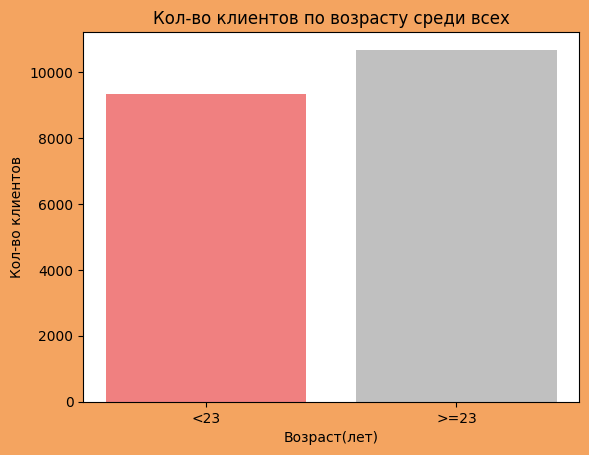

In [138]:
all_age_Min23 =  df[(df['Age'] < 23)]['Age'].value_counts().agg('sum')
all_age_Max23 =  df[(df['Age'] >= 23)]['Age'].value_counts().agg('sum')


plt.figure(facecolor='sandybrown')
plt.bar(['<23', '>=23'], [all_age_Min23, all_age_Max23], color = ['lightcoral', 'silver'])
plt.title('Кол-во клиентов по возрасту среди всех')
plt.xlabel('Возраст(лет)')
plt.ylabel('Кол-во клиентов')

all_age_Min23 + all_age_Max23


590 638 1228


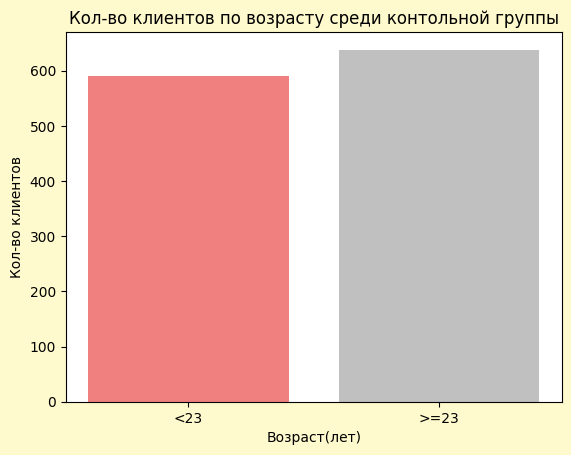

In [139]:
control_age_Min23 =  df[(df['A'] != 1) & (df['B'] != 1) & (df['Purchased'] == 1) & (df['Age'] < 23)]['Age'].value_counts().agg('sum')
control_age_Max23 =  df[(df['A'] != 1) & (df['B'] != 1) & (df['Purchased'] == 1) & (df['Age'] >= 23)]['Age'].value_counts().agg('sum')

plt.figure(facecolor='lemonchiffon')
plt.bar(['<23', '>=23'], height = [control_age_Min23, control_age_Max23], color = ['lightcoral', 'silver'])
plt.title('Кол-во клиентов по возрасту среди контольной группы')
plt.xlabel('Возраст(лет)')
plt.ylabel('Кол-во клиентов')


# control_age_Min23.sort_values(by = 'Age')
print(control_age_Min23, control_age_Max23, all_cnt_purch - a_cnt_purch - b_cnt_purch)

300

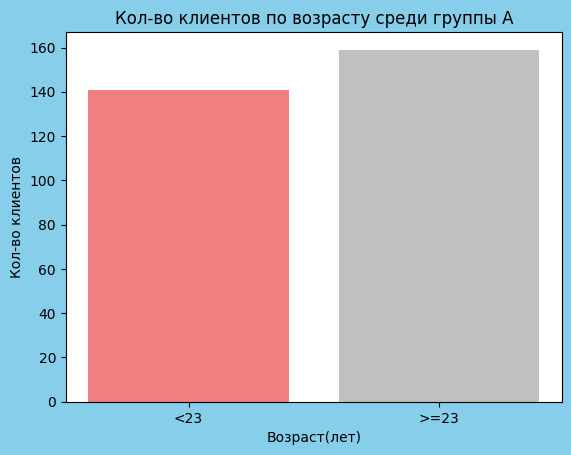

In [140]:
a_age_Min23 =  df[(df['A'] == 1) & (df['Age'] < 23)]['Age'].value_counts().agg('sum')
a_age_Max23 =  df[(df['A'] == 1) & (df['Age'] >= 23)]['Age'].value_counts().agg('sum')

plt.figure(facecolor='skyblue')
plt.bar(['<23', '>=23'], height = [a_age_Min23, a_age_Max23], color = ['lightcoral', 'silver'])
plt.title('Кол-во клиентов по возрасту среди группы A')
plt.xlabel('Возраст(лет)')
plt.ylabel('Кол-во клиентов')

a_age_Min23 + a_age_Max23

500

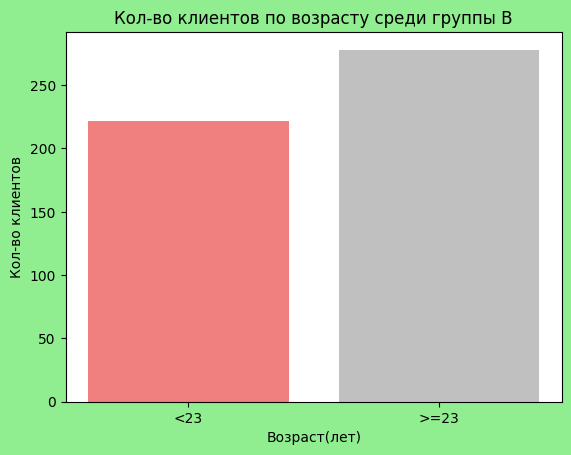

In [141]:
b_F_M =  df[df['B'] == 1]['Gender'].value_counts()
b_age_Min23 =  df[(df['B'] == 1) & (df['Age'] < 23)]['Age'].value_counts().agg('sum')
b_age_Max23 =  df[(df['B'] == 1) & (df['Age'] >= 23)]['Age'].value_counts().agg('sum')

plt.figure(facecolor='lightgreen')
plt.bar(['<23', '>=23'], height = [b_age_Min23, b_age_Max23], color = ['lightcoral', 'silver'])
plt.title('Кол-во клиентов по возрасту среди группы B')
plt.xlabel('Возраст(лет)')
plt.ylabel('Кол-во клиентов')


b_age_Min23 + b_age_Max23

##Клиенты по давности клиента для всех, контрольной группы, А и В


In [142]:
df

,BirthdayYear,Age,Gender,ClientSince,A,B,Purchased
0,2003,21,Male,2023,NaN,NaN,NaN
1,2001,23,Female,2024,NaN,NaN,NaN
2,2002,22,Male,2024,NaN,NaN,NaN
3,2004,20,Male,2023,NaN,1.0,1.0
4,2003,21,Female,2024,NaN,NaN,NaN
...,...,...,...,...,...,...,...
19995,2001,23,Male,2024,NaN,NaN,NaN
19996,2001,23,Male,2024,NaN,NaN,NaN
19997,1998,26,Male,2024,NaN,NaN,NaN
19998,2003,21,Male,2023,NaN,NaN,NaN


цвета  ['lightgreen','skyblue', 'lemonchiffon', 'sandybrown'];

для пола ['deepskyblue', 'hotpink']

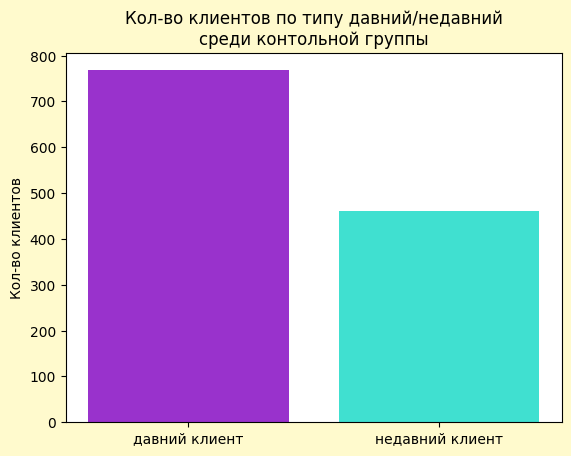

In [143]:
def davnost(kriterii, col_fon, group_name):
  davni =  df[kriterii & (df['ClientSince'] <= 2023)]['ClientSince'].value_counts().agg('sum')
  nedavni =  df[kriterii & (df['ClientSince'] > 2023)]['ClientSince'].value_counts().agg('sum')

  plt.figure(facecolor= col_fon)
  plt.bar(['давний клиент', 'недавний клиент'], height = [davni, nedavni], color = ['darkorchid', 'turquoise'])
  plt.title(f'''Кол-во клиентов по типу давний/недавний
среди {group_name}''')
  # plt.xlabel('Возраст(лет)')
  plt.ylabel('Кол-во клиентов')

kriterii = (df['A'] != 1) & (df['B'] != 1) & (df['Purchased'] == 1)
col = 'lemonchiffon'
group_name = 'контольной группы'
davnost(kriterii, col, group_name)


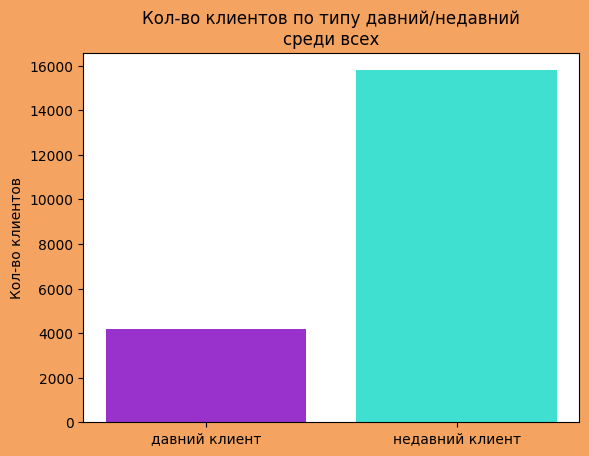

In [144]:
kriterii = True
col_fon = 'sandybrown'
group_name = 'всех'
davnost(kriterii, col_fon, group_name)

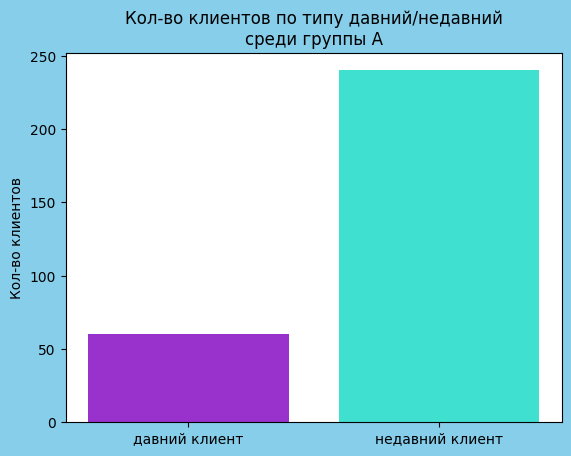

In [145]:

kriterii = (df['A'] == 1)
col_fon = 'skyblue'
group_name = 'группы A'
davnost(kriterii, col_fon, group_name)

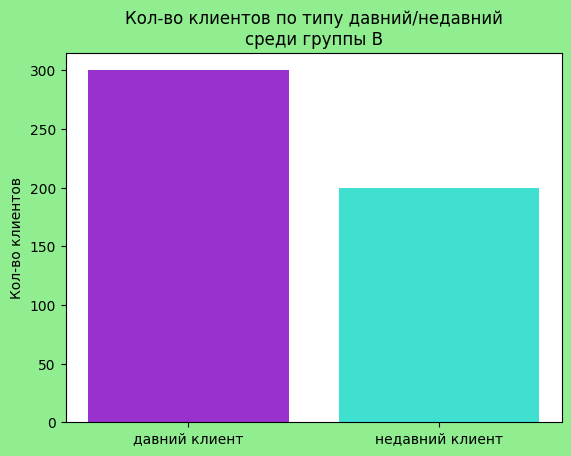

In [146]:
kriterii = (df['B'] == 1)
col_fon = 'lightgreen'
group_name = 'группы B'
davnost(kriterii, col_fon, group_name)


#Черный уровень

In [147]:
# цвета ['lightgreen','skyblue', 'lemonchiffon', 'sandybrown'];
# для пола ['deepskyblue', 'hotpink']
# старый\новый ['darkorchid', 'turquoise']

def en(s):
  s_splited = s.split('/n')
  res = '''
'''.join(s_splited)
  return res

# print(en('A для else/nProfit'))

def sp(x, repeat):
  x = str(x)
  for k in range(1, repeat+1):
    x = x[:-3 *(k)  - (k-1)] + ' ' + x[-3 *(k) - (k-1):]
  return x
print(sp(12152132000,3))

12 152 132 000


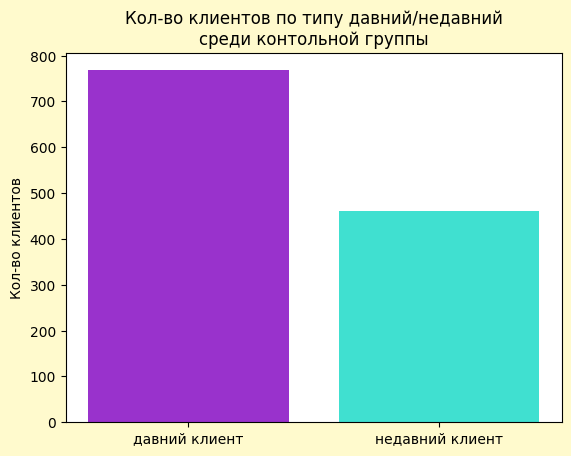

In [148]:
def davnost(kriterii, col_fon, group_name):
  davni =  df[kriterii & (df['ClientSince'] <= 2023)]['ClientSince'].value_counts().agg('sum')
  nedavni =  df[kriterii & (df['ClientSince'] > 2023)]['ClientSince'].value_counts().agg('sum')

  plt.figure(facecolor= col_fon)
  plt.bar(['давний клиент', 'недавний клиент'], height = [davni, nedavni], color = ['darkorchid', 'turquoise'])
  plt.title(f'''Кол-во клиентов по типу давний/недавний
среди {group_name}''')
  # plt.xlabel('Возраст(лет)')
  plt.ylabel('Кол-во клиентов')

kriterii = (df['A'] != 1) & (df['B'] != 1) & (df['Purchased'] == 1)
col = 'lemonchiffon'
group_name = 'контольной группы'
davnost(kriterii, col, group_name)

In [149]:
df

,BirthdayYear,Age,Gender,ClientSince,A,B,Purchased
0,2003,21,Male,2023,NaN,NaN,NaN
1,2001,23,Female,2024,NaN,NaN,NaN
2,2002,22,Male,2024,NaN,NaN,NaN
3,2004,20,Male,2023,NaN,1.0,1.0
4,2003,21,Female,2024,NaN,NaN,NaN
...,...,...,...,...,...,...,...
19995,2001,23,Male,2024,NaN,NaN,NaN
19996,2001,23,Male,2024,NaN,NaN,NaN
19997,1998,26,Male,2024,NaN,NaN,NaN
19998,2003,21,Male,2023,NaN,NaN,NaN


0.2
0.0875

0.2
0.03

0.2
0.029947916666666668



([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'old A'),
  Text(1, 0, 'new A'),
  Text(2, 0, 'old B'),
  Text(3, 0, 'new B'),
  Text(4, 0, 'old Естеств.'),
  Text(5, 0, 'new Естеств.')])

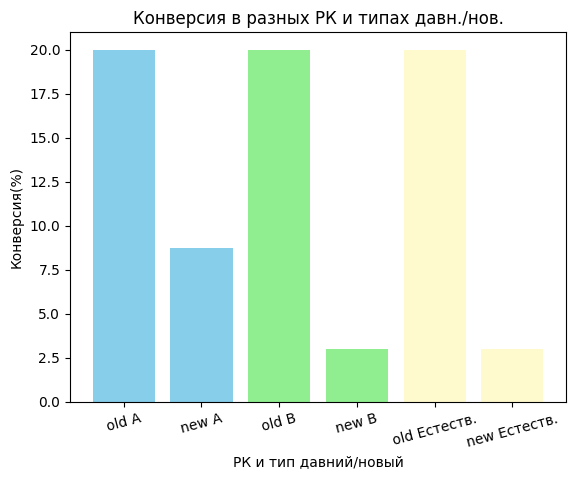

In [150]:
def konvers(kriterii, dav):
  if dav:
    dav = (df['ClientSince'] <= 2023)
  else:
    dav = (df['ClientSince'] > 2023)
  buy =  df[kriterii & dav & (df['Purchased'] == 1)]['ClientSince'].value_counts().agg('sum')
  all =  df[kriterii & dav]['ClientSince'].value_counts().agg('sum')
  return buy / all

print(konvers((df['A'] == 1),True))
print(konvers((df['A'] == 1),False))
print()
print(konvers((df['B'] == 1),True))
print(konvers((df['B'] == 1),False))
print()
print(konvers((df['A'] != 1) & (df['B'] != 1), True))
print(konvers((df['A'] != 1) & (df['B'] != 1), False))
print()

black_1_graf = [konvers((df['A'] == 1),True), konvers((df['A'] == 1),False),
                konvers((df['B'] == 1),True), konvers((df['B'] == 1),False),
                konvers((df['A'] != 1) & (df['B'] != 1), True), konvers((df['A'] != 1) & (df['B'] != 1), False)]
black_1_graf = [x*100 for x in black_1_graf]
# print(a,b,nature, black_1_graf)

col2 = ['skyblue','skyblue', 'lightgreen','lightgreen', 'lemonchiffon','lemonchiffon']

names = []
for x in ['A','B','Естеств.']:
  for y in ['old','new']:
    names.append(f'{y} {x}')

plt.bar(x = names, height = black_1_graf,
        color = col2)
plt.title('Конверсия в разных РК и типах давн./нов.')
plt.xlabel('РК и тип давний/новый')
plt.ylabel('Конверсия(%)')
plt.xticks(rotation=15)




#   plt.figure(facecolor= col_fon)
#   plt.bar(['давний клиент', 'недавний клиент'], height = [davni, nedavni], color = ['darkorchid', 'turquoise'])
#   plt.title(f'''Кол-во клиентов по типу давний/недавний
# среди {group_name}''')
#   #

# kriterii = (df['A'] != 1) & (df['B'] != 1) & (df['Purchased'] == 1)
# col = 'lemonchiffon'
# group_name = 'контольной группы'
# davnost(kriterii, col, group_name)/

In [151]:
df

,BirthdayYear,Age,Gender,ClientSince,A,B,Purchased
0,2003,21,Male,2023,NaN,NaN,NaN
1,2001,23,Female,2024,NaN,NaN,NaN
2,2002,22,Male,2024,NaN,NaN,NaN
3,2004,20,Male,2023,NaN,1.0,1.0
4,2003,21,Female,2024,NaN,NaN,NaN
...,...,...,...,...,...,...,...
19995,2001,23,Male,2024,NaN,NaN,NaN
19996,2001,23,Male,2024,NaN,NaN,NaN
19997,1998,26,Male,2024,NaN,NaN,NaN
19998,2003,21,Male,2023,NaN,NaN,NaN


0.2
0.11818181818181818

0.1865671641791045
0.0380952380952381

0.20192822710230315
0.030656360539761562



Text(21, 9.5, 'Ест.')

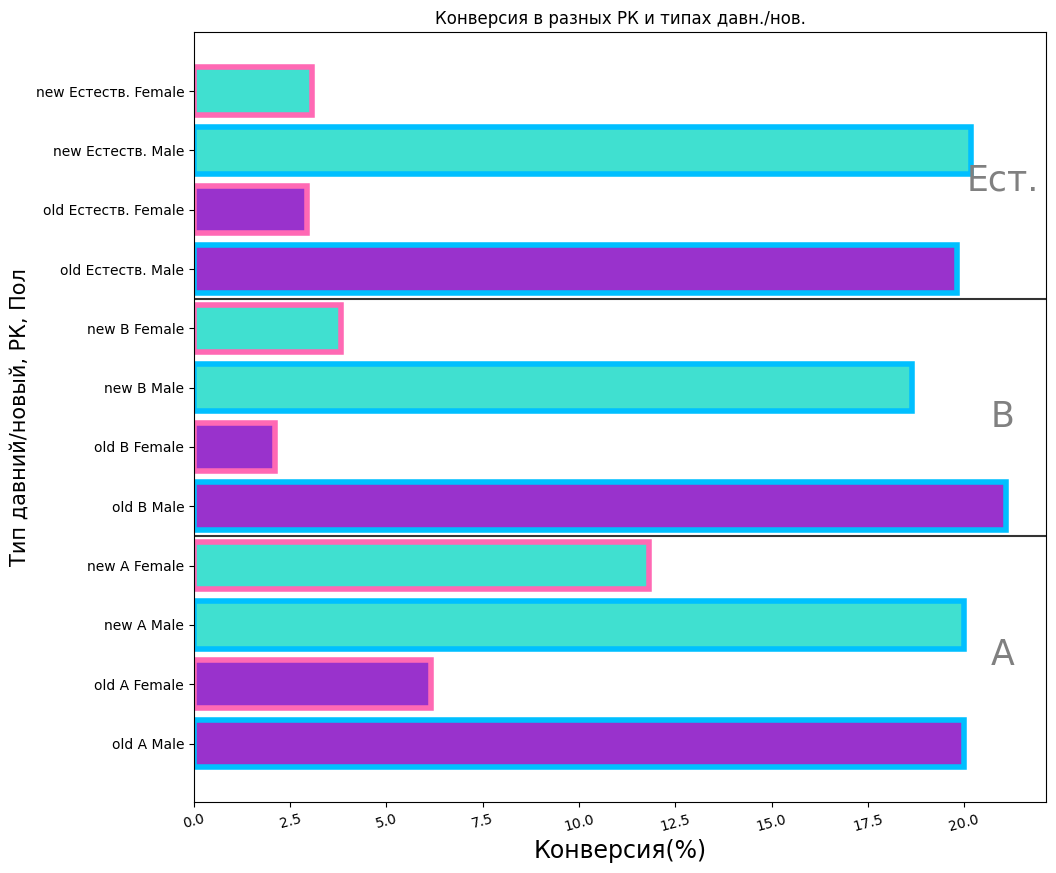

In [152]:
def konvers(kriterii, dav, mal = 'femal'):
  if dav:
    dav = (df['ClientSince'] <= 2023)
  else:
    dav = (df['ClientSince'] > 2023)
  if mal == 'mal':
    mal = (df['Gender'] == 'Male')
  else:
    mal = (df['Gender'] == 'Female')

  buy =  df[mal & kriterii & dav & (df['Purchased'] == 1)]['ClientSince'].value_counts().agg('sum')
  all =  df[mal & kriterii & dav]['ClientSince'].value_counts().agg('sum')
  return buy / all

print(konvers((df['A'] == 1),True))
print(konvers((df['A'] == 1),False))
print()
print(konvers((df['B'] == 1),True))
print(konvers((df['B'] == 1),False))
print()
print(konvers((df['A'] != 1) & (df['B'] != 1), True))
print(konvers((df['A'] != 1) & (df['B'] != 1), False))
print()
mal = 'mal'
black_1_graf = [konvers((df['A'] == 1),True, mal), konvers((df['A'] == 1),False, mal),# А стар/нов Мужик
                konvers((df['A'] == 1),True), konvers((df['A'] == 1),False, False),# А стар/нов женщина
                konvers((df['B'] == 1),True, mal), konvers((df['B'] == 1),False, mal), # В стар/нов Мужик
                konvers((df['B'] == 1),True), konvers((df['B'] == 1),False), # В стар/нов женщина
                konvers((df['A'] != 1) & (df['B'] != 1), True, mal), konvers((df['A'] != 1) & (df['B'] != 1), False, mal),
                konvers((df['A'] != 1) & (df['B'] != 1), True), konvers((df['A'] != 1) & (df['B'] != 1), False)]
black_1_graf = [x*100 for x in black_1_graf]
# print(a,b,nature, black_1_graf)

col2 = ['skyblue','skyblue', 'skyblue','skyblue',
        'lightgreen','lightgreen', 'lightgreen','lightgreen',
        'lemonchiffon','lemonchiffon', 'lemonchiffon','lemonchiffon']
col3 = ['darkorchid', 'darkorchid', 'turquoise', 'turquoise']

names = []
for x in ['A','B','Естеств.']:
  for y in ['old','new']:
    for z in ['Male','Female']:
      names.append(f'{y} {x} {z}')

plt.figure(figsize=(11, 10))
plt.barh(y = names, width = black_1_graf, linewidth = 4, label=['1', '2', '3', '4', '5', '6', '7', '8', '9','10','11', '12'],
        color = col3, edgecolor = ['deepskyblue', 'hotpink'])
plt.title('Конверсия в разных РК и типах давн./нов.')
plt.ylabel('Тип давний/новый, РК, Пол', fontsize = 15)
plt.xlabel('Конверсия(%)', fontsize = 17)
plt.xticks(rotation=15)

plt.axhline(y=3.5, color='black', linestyle='-', linewidth=1.5, alpha=0.8, label=None)
plt.axhline(y=7.5, color='black', linestyle='-', linewidth=1.5, alpha=0.8, label=None)

plt.text(x=21 , y= 1.5 , s='A', fontsize = 25,ha='center', va='center', color='gray')
plt.text(x=21 , y= 5.5 , s='B', fontsize = 25,ha='center', va='center', color='gray')
plt.text(x=21 , y= 9.5 , s='Ест.', fontsize = 25,ha='center', va='center', color='gray')
# plt.legend(bbox_to_anchor = (1,0.,0.1,1))

In [184]:
df

,BirthdayYear,Age,Gender,ClientSince,A,B,Purchased
0,2003,21,Male,2023,NaN,NaN,NaN
1,2001,23,Female,2024,NaN,NaN,NaN
2,2002,22,Male,2024,NaN,NaN,NaN
3,2004,20,Male,2023,NaN,1.0,1.0
4,2003,21,Female,2024,NaN,NaN,NaN
...,...,...,...,...,...,...,...
19995,2001,23,Male,2024,NaN,NaN,NaN
19996,2001,23,Male,2024,NaN,NaN,NaN
19997,1998,26,Male,2024,NaN,NaN,NaN
19998,2003,21,Male,2023,NaN,NaN,NaN


<class 'pandas.core.series.Series'>
RangeIndex: 20000 entries, 0 to 19999
Series name: Age
Non-Null Count  Dtype
--------------  -----
20000 non-null  int64
dtypes: int64(1)
memory usage: 156.4 KB


Text(0.5, 0, 'Возраст(лет)')

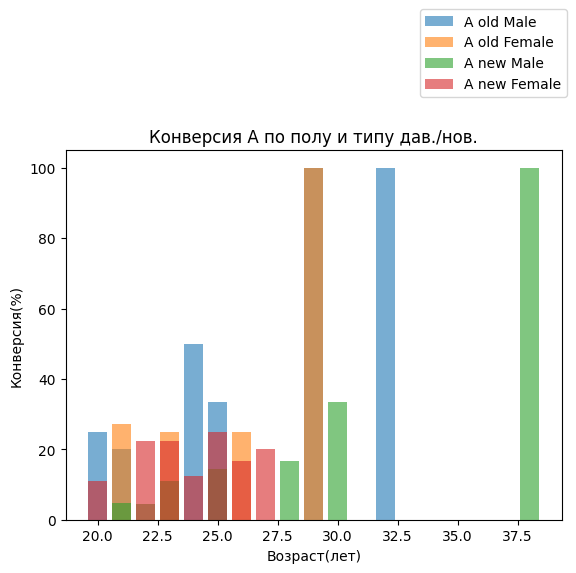

In [234]:
df['Age'].info()
df['Age'].describe()
def misha(star, grup, gen):
  if star: star = (df['ClientSince'] <= 2023)
  else: star = (df['ClientSince'] == 2024)
  1
  if grup == 'a': grup = (df['A'] == 1)
  elif grup == 'b': grup = (df['B'] == 1)
  else: grup = ((df['A'] != 1) & (df['B'] != 1))
  1
  if gen == 'm': gen = (df['Gender'] == 'Male')
  else: gen = (df['Gender'] == 'Female')
  1
  starii_buy =  df[star & grup & gen & (df['Purchased']  == 1)]['Age'].value_counts().sort_index()
  starii_nebuy = df[star & grup & gen]['Age'].value_counts().sort_index()
  return (starii_buy / starii_nebuy) * 100

def lab(gr, st, pol):
  res = ''
  if gr == 'a': res += 'A '
  elif gr == 'b': res += 'B '
  elif gr == 'else': res += 'Естеств. '
  1
  if st == 1: res += 'old '
  elif st == 0: res += 'new '
  1
  if pol == 'm': res += 'Male'
  elif pol == 'f': res += 'Female'
  return res

gr = 'a'
# for gr in ['a','b','else']:
for st in [1,0]:
  for pol in ['m','f']:
    plt.bar(x = misha(st, gr , pol).index.tolist(), height = misha(st, gr , pol), alpha=0.6, label = lab(gr, st, pol))

plt.legend(bbox_to_anchor = (0.7,0.,0.1,1.4))

plt.title('Конверсия A по полу и типу дав./нов.')
plt.ylabel('Конверсия(%)')
plt.xlabel('Возраст(лет)')

# misha(1,'a', 'm').index#.tolist()

Text(0.5, 0, 'Возраст(лет)')

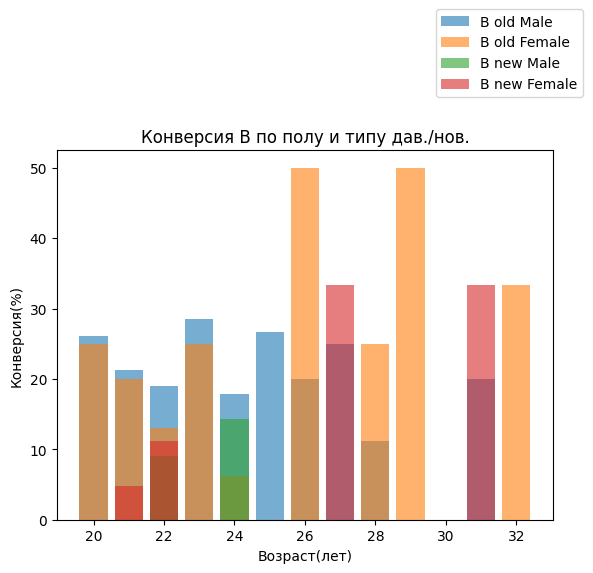

In [245]:
gr = 'b'
# for gr in ['a','b','else']:
for st in [1,0]:
  for pol in ['m','f']:
    plt.bar(x = misha(st, gr , pol).index.tolist(), height = misha(st, gr , pol), alpha=0.6, label = lab(gr, st, pol))

plt.legend(bbox_to_anchor = (0.75,0.,0.1,1.4))

plt.title('Конверсия В по полу и типу дав./нов.')
plt.ylabel('Конверсия(%)')
plt.xlabel('Возраст(лет)')

Text(0.5, 0, 'Возраст(лет)')

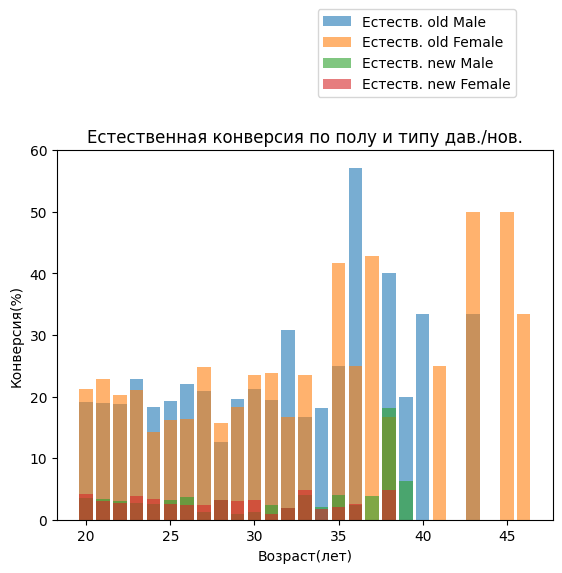

In [244]:
gr = 'else'
# for gr in ['a','b','else']:
for st in [1,0]:
  for pol in ['m','f']:
    plt.bar(x = misha(st, gr , pol).index.tolist(), height = misha(st, gr , pol), alpha=0.6, label = lab(gr, st, pol))

plt.legend(bbox_to_anchor = (0.84,0.,0.1,1.4))

plt.title('Естественная конверсия по полу и типу дав./нов.')
plt.ylabel('Конверсия(%)')
plt.xlabel('Возраст(лет)')

In [43]:
grouped = df.groupby(['Age','Gender'])
black2 = grouped[(grouped['Purchased'] == 1)]


KeyError: 'Column not found: False'